In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def create_random_grid(size=5, reward_positions=3, penalty_positions=3):
    grid = np.zeros((size, size))

    # Set random rewards
    for _ in range(reward_positions):
        x, y = random.randint(0, size-1), random.randint(0, size-1)
        grid[x, y] = random.randint(1, 10)  # random reward between 1 and 10

    # Set random penalties
    for _ in range(penalty_positions):
        x, y = random.randint(0, size-1), random.randint(0, size-1)
        grid[x, y] = random.randint(-10, -1)  # random penalty between -10 and -1

    # Set a goal with high reward
    goal_x, goal_y = random.randint(0, size-1), random.randint(0, size-1)
    grid[goal_x, goal_y] = 20  # high reward for the goal

    return grid, (goal_x, goal_y)


In [3]:
def q_learning(grid, goal, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
    size = grid.shape[0]
    q_table = np.zeros((size, size, 4))  # Initialize Q-table with 4 actions (up, down, left, right)
    actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # right, left, down, up

    for _ in range(episodes):
        x, y = random.randint(0, size-1), random.randint(0, size-1)

        while (x, y) != goal:
            if random.uniform(0, 1) < epsilon:
                action = random.randint(0, 3)  # Explore
            else:
                action = np.argmax(q_table[x, y])  # Exploit

            dx, dy = actions[action]
            nx, ny = x + dx, y + dy

            if 0 <= nx < size and 0 <= ny < size:
                reward = grid[nx, ny]
                max_future_q = np.max(q_table[nx, ny])
                current_q = q_table[x, y, action]

                # Q-learning formula
                q_table[x, y, action] = current_q + alpha * (reward + gamma * max_future_q - current_q)

                x, y = nx, ny  # Move to the next state
            else:
                break  # Hit boundary; stop

    return q_table

In [9]:
def value_iteration_with_policy(grid, goal, gamma=0.9, theta=1e-6):
    size = grid.shape[0]
    value_table = np.zeros((size, size))
    policy = np.zeros((size, size), dtype=int)  # Initialize policy grid
    actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # right, left, down, up

    while True:
        delta = 0
        for x in range(size):
            for y in range(size):
                if (x, y) == goal:
                    continue

                v = value_table[x, y]

                # Find the best action that maximizes the future reward
                max_value = -float('inf')
                best_action = 0
                for action_index, (dx, dy) in enumerate(actions):
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < size and 0 <= ny < size:
                        value = grid[nx, ny] + gamma * value_table[nx, ny]
                        if value > max_value:
                            max_value = value
                            best_action = action_index

                value_table[x, y] = max_value
                policy[x, y] = best_action  # Store the best action in the policy grid
                delta = max(delta, abs(v - value_table[x, y]))

        if delta < theta:
            break

    return value_table, policy



In [10]:
def run_benchmark_multiple_grids(num_grids=3, size=5):
    q_policies = []
    value_policies = []
    grids = []

    for i in range(num_grids):
        grid, goal = create_random_grid(size)
        grids.append(grid)

        # Q-learning
        q_table = q_learning(grid, goal)
        q_policy = np.argmax(q_table, axis=2)
        q_policies.append(q_policy)

        # Value Iteration
        _, value_policy = value_iteration_with_policy(grid, goal)
        value_policies.append(value_policy)

    return grids, q_policies, value_policies



In [12]:
def plot_policies(grids, q_policies, value_policies):
    fig, axs = plt.subplots(len(grids), 3, figsize=(15, 5 * len(grids)))

    # Define the action directions for both policies
    action_meanings = {
        0: '→ (Right)',
        1: '← (Left)',
        2: '↓ (Down)',
        3: '↑ (Up)'
    }

    for i, (grid, q_policy, value_policy) in enumerate(zip(grids, q_policies, value_policies)):
        # Plot the Random Grid
        im0 = axs[i, 0].imshow(grid, cmap="coolwarm", interpolation="none")
        axs[i, 0].set_title(f"Grid {i+1} (Rewards & Penalties)")
        fig.colorbar(im0, ax=axs[i, 0], fraction=0.046, pad=0.04)

        # Plot the Q-learning Policy
        im1 = axs[i, 1].imshow(q_policy, cmap="viridis", interpolation="none")
        axs[i, 1].set_title(f"Q-learning Policy {i+1}")

        # Add colorbar and legend for Q-learning actions
        cbar1 = fig.colorbar(im1, ax=axs[i, 1], fraction=0.046, pad=0.04)
        cbar1.set_ticks([0, 1, 2, 3])
        cbar1.set_ticklabels([action_meanings[a] for a in range(4)])

        # Plot the Value Iteration (MDP) Policy
        im2 = axs[i, 2].imshow(value_policy, cmap="viridis", interpolation="none")
        axs[i, 2].set_title(f"Value Iteration Policy {i+1}")

        # Add colorbar and legend for Value Iteration actions
        cbar2 = fig.colorbar(im2, ax=axs[i, 2], fraction=0.046, pad=0.04)
        cbar2.set_ticks([0, 1, 2, 3])
        cbar2.set_ticklabels([action_meanings[a] for a in range(4)])

    # Add a label to each column for clarity
    axs[0, 0].set_ylabel("Random Grid")
    axs[0, 1].set_ylabel("Q-learning Policy")
    axs[0, 2].set_ylabel("Value Iteration Policy")

    plt.tight_layout()
    plt.show()



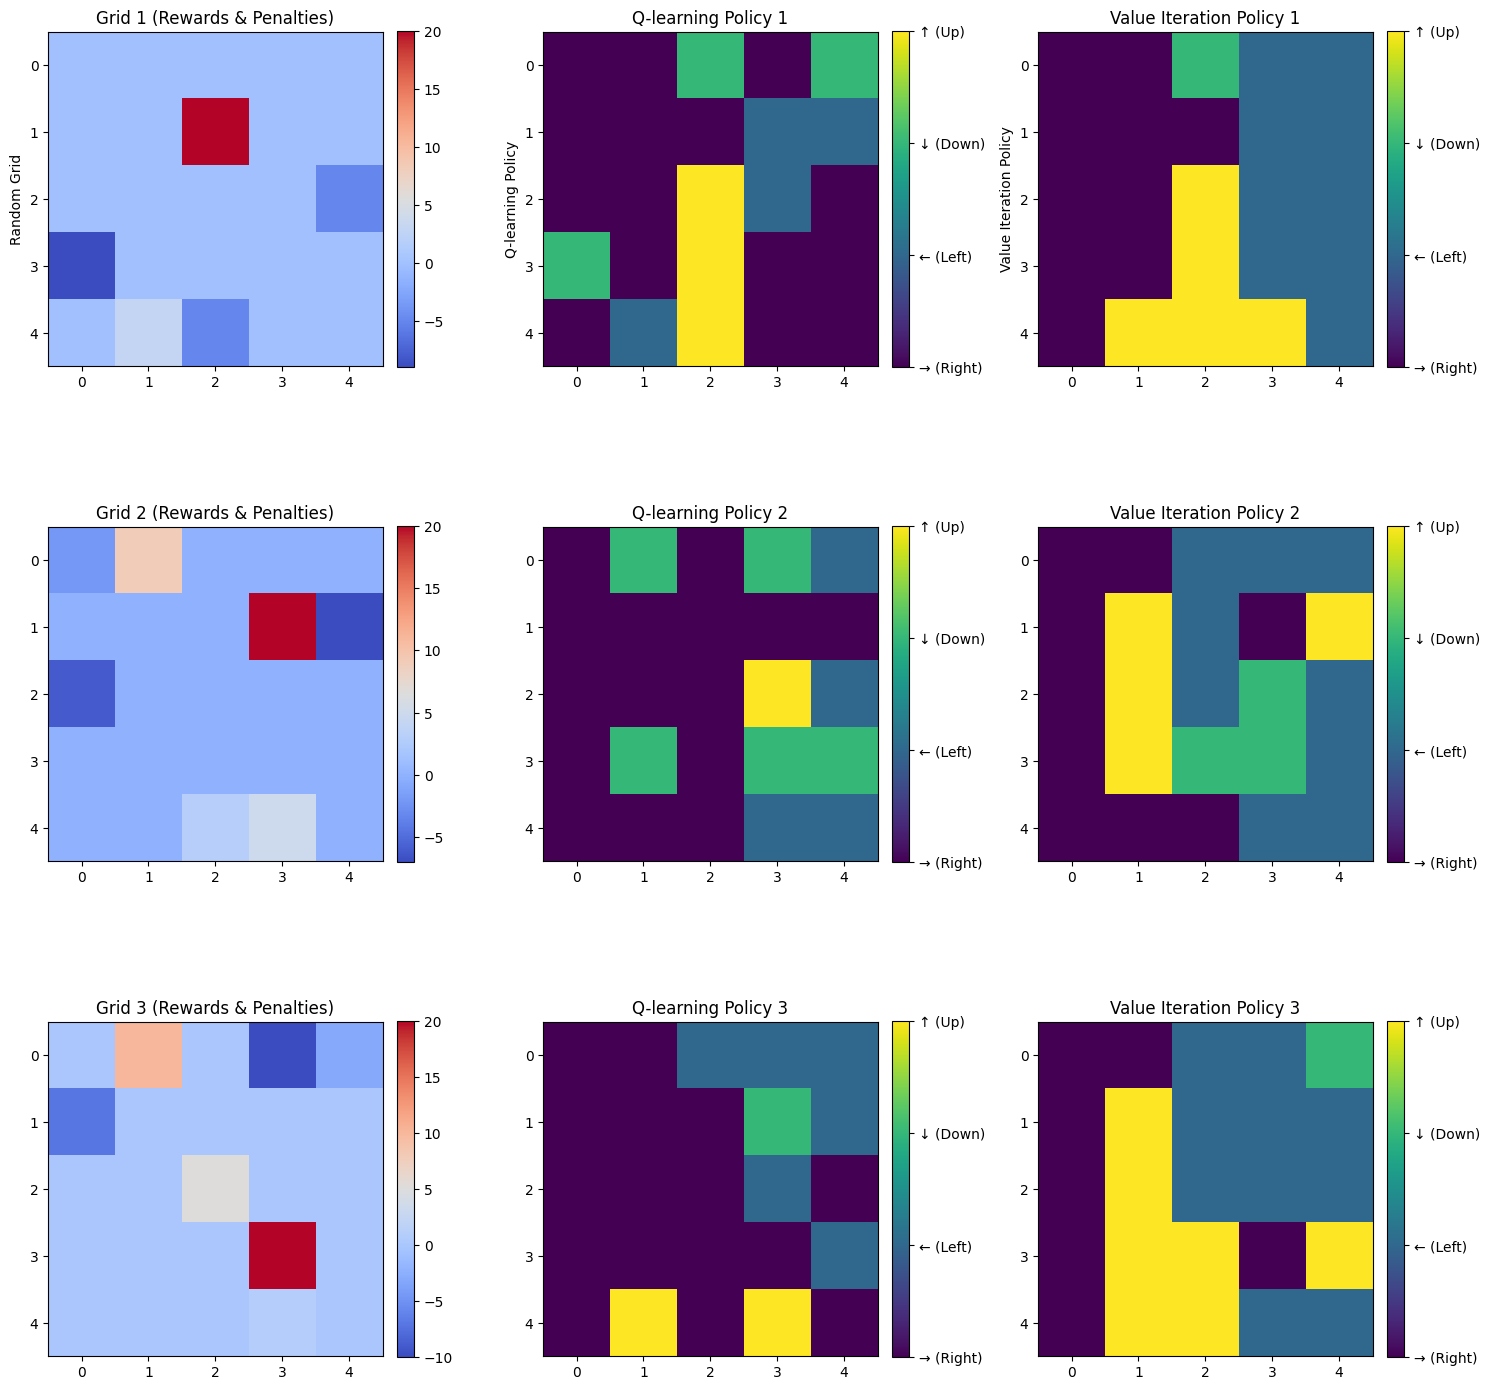

In [13]:
# Run benchmark on three random grids
grids, q_policies, value_policies = run_benchmark_multiple_grids(num_grids=3)

# Plot the policies for comparison
plot_policies(grids, q_policies, value_policies)
